# LS 123 Data Analysis Project (Spring 2019)
### by David Jeong & Bowie Lam

# Research, Data Applicability, and Data Analysis Exploration

**Questions:**
* Can we predict if race influences whether or not a person reports a crime based on data from other victims?
* Can we predict who is a likely victim given the type of crime, injury, and various other features?
* Are certain races more prone to certain types of crime and does income have an impact on the types of crime that victims experience?


**Motivation:**
* We wanted to explore this topic because we personally have African American friends who are victimized but do not report these instances because they don't believe in the justice and/or the legal system. They often feel as if little to nothing will be done, and that it happens too often to care. Therefore, wanted to see if there is a relationship between race and unreport crimes, and if machine learning will detect anything different. In addition, It's also important to examine what other factors or features may prevent a victim from reporting a crime or not. Unreported crimes allow criminals to get away free, thus not held accountable for their actions. And victims are not proetcted from this injustice. 

**Note:** You may need to install eli5 using "pip install eli5".

In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 3.5MB/s 


In [0]:
# load all libraries 

import numpy as np
import datetime as dt
import pandas as pd
import seaborn as sns
import xgboost as xgbb
import eli5

#matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

#scikit-learn
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from eli5.sklearn import PermutationImportance
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import roc_curve, auc


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**About the Data:**
* The data cromes from the National Crime Victimization Survey, which has been collected by the U.S. Census Bureau since 1973. It's collected biannually from a large sample of households totaling over at least one hundred thousand, therefore there's a large sample size to work with. We chose this dataset mainly because it's been officially cleaned and all features are strategically mapped to numerical values. This form of quantitative data is easy to replicate, comparable, and can be statistically analyzed. In addition, this survey is the primary source of information on criminal victimization, and the only source that has data on crimes that are not reported to law enforcement, therefore it's a credible dataset to rely on and utilize.


* Variables/Features in the data includes information on the crime itself, such as the type, year, location, and region of the incident, if there was a weapon involved (if yes, then what category does it fall under), if there was an injury (if yes, then was medical treatment provided), description/category of the victimization, etc. There's basic demographic information about the respondent, such as age, household income, location of residence (urban, suburban, or rural), marital status, race, and sex. Lastly, there's information on the relationship between the offender and the victim, which ranges from "intimiate" to "do not know number of offenders" and the data also indicates whether or not the crime was reported to police, and reasons the crime was or was not reported.
*Each row represents one household surveyed and each column represents different questions and the respondents’ answers to them.


* Download the 2008-2017 Personal Victimization Dataset from this link: https://www.bjs.gov/developer/ncvs/index.cfm
* View the codebook for the dataset from this link: https://www.bjs.gov/developer/ncvs/personalFields.cfm

In [0]:
# download the data
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/NCVS_PERSONAL_VICTIMIZATION_2008-2017.csv')
data_num = data.copy(deep=True)
data.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,region,msa,direl,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
0,2008,4828.52379,2,1,2,1,2,1,3.0,1,2,2,3,2,2,0,1,4,2,0,0.0,2.0,4
1,2008,3087.88814,1,1,2,1,7,2,6.0,1,2,2,4,2,1,3,1,3,1,0,0.0,1.0,1
2,2008,3302.31117,2,1,2,1,5,1,1.0,1,2,2,1,1,2,0,1,1,1,0,0.0,2.0,1
3,2008,6796.96420,2,2,2,2,2,1,3.0,1,2,1,4,2,2,0,1,4,2,0,0.0,2.0,4
4,2008,3758.85256,2,1,2,1,5,5,88.0,1,3,2,4,2,3,5,1,2,1,0,0.0,2.0,5


In [0]:
# show the column labels for the dataframe
data.columns

Index(['year', 'weight', 'gender', 'race1r', 'hispanic', 'ethnic1r', 'ager',
       'marital2', 'hincome', 'popsize', 'region', 'msa', 'direl', 'notify',
       'weapon', 'weapcat', 'newcrime', 'newoff', 'seriousviolent', 'injury',
       'treatment', 'vicservices', 'locationr'],
      dtype='object')

In [0]:
# group by the location of residence (msa) then race (race1r)
data.groupby(['msa', 'race1r']).count()['year']

msa  race1r
1    1         4566
     2         1292
     3          616
2    1         5721
     2          684
     3          512
3    1         1833
     2          139
     3          124
Name: year, dtype: int64

**Note:**
* "msa" key:
  * 1 =	Urban
  * 2 = Suburban
  * 3 =	Rural 
* "race1r" key:
  * 1 = white
  * 2 = black
  * 3 = other

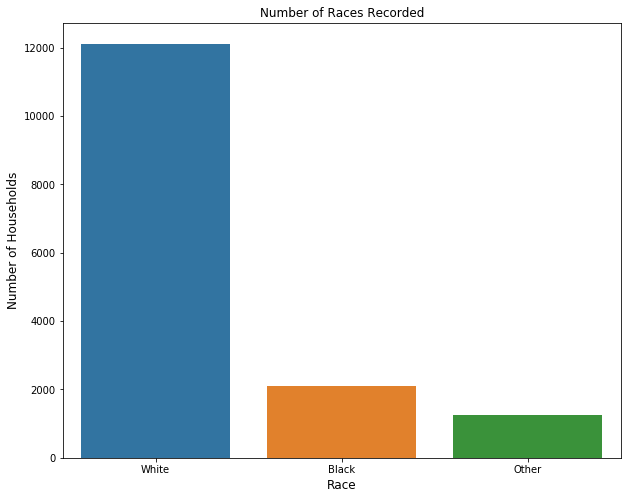

In [0]:
# plot a bar graph showing how many households recorded for each race
race_count = data['race1r'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(race_count.index, race_count.values)
plt.title('Number of Races Recorded')
plt.ylabel('Number of Households', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.xticks([0,1,2],['White', 'Black', 'Other'])
plt.show()

**Note:** 
* From the bar graph above, it illustrates is an immense imbalance in the number of responses received from the different races (white, black, and other). This could be due to the regions in which the surveyors chose to survey, such as picking regions that are populated by more white households than blacks or others. Or, this discrepency could be due to the willingness of whites as a culture to participate in surveys compared to blacks and others because they view it as something beneficial to studies.

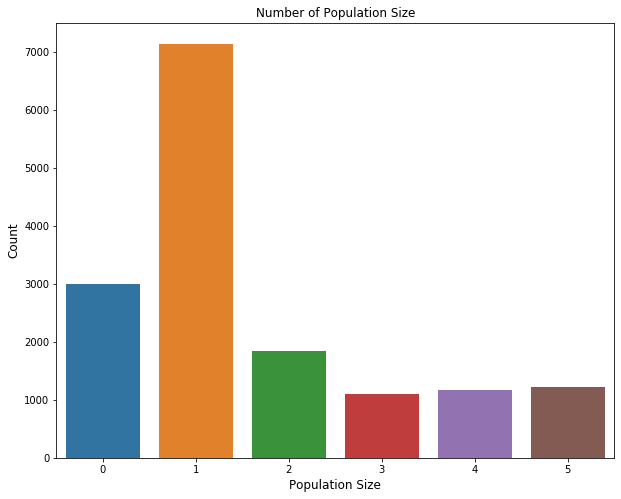

In [0]:
# plot a bar graph showing the number of households recorded for each population size
pop_count = data['popsize'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(pop_count.index, pop_count.values)
plt.title('Number of Population Size')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Population Size', fontsize=12)
plt.xticks(np.arange(6))
plt.show()

In [0]:
# descriptions for the x-axis values for the bar graph above
popsize = pd.DataFrame()
popsize['Description'] = ['Not a place', '100,000 or fewer', '100,000 to 249,999', '250,000 to 499,999', '500,000 to 999,999', '1 million or more']
popsize.index.rename('Value', inplace=True)
popsize

,Description
Value,
0,Not a place
1,"100,000 or fewer"
2,"100,000 to 249,999"
3,"250,000 to 499,999"
4,"500,000 to 999,999"
5,1 million or more


**Note:**
* From the bar graph above, it illustrates that most of the households were located in cities or areas with a population of 100,000 or fewer.
* The size range for the place in which the housing unit is located. "Not a place" is a concentration of population that is either not legally bounded as an incorporated place having an active government or not delineated for statistical purposes as a census designated place with definite geographic boundaries, such as a city, town, or village.

In [0]:
# return the number of households for each location residence
data['msa'].value_counts(sort=False)

1    6474
2    6917
3    2096
Name: msa, dtype: int64

**Note:**
* 1 =	Urban
* 2 = Suburban
* 3 =	Rural 

In [0]:
# return the number of households in each population size for each race
data.groupby(['msa', 'popsize']).count()['year']

msa  popsize
1    0            17
     1          1516
     2          1441
     3          1106
     4          1177
     5          1217
2    0          2227
     1          4285
     2           405
3    0           755
     1          1341
Name: year, dtype: int64

In [0]:
# group by the year (year) then whether or not the crime was reported to police (notify)
# then count cells for each
temp = data.drop(data[data['notify'] == 8].index)
temp = temp.drop(data[data['notify'] == 3].index)
temp1 = temp.groupby(['year', 'notify']).count()[['weight']]
total = temp.groupby('year').count()['notify']
temp1['weight'] = temp1['weight'] / total
temp1.rename(columns={'weight':'percentage'}, inplace=True)
temp1

percentage
year notify            
2008 1         0.483138
     2         0.516862
2009 1         0.500806
     2         0.499194
2010 1         0.527482
     2         0.472518
2011 1         0.494883
     2         0.505117
2012 1         0.480024
     2         0.519976
2013 1         0.468685
     2         0.531315
2014 1         0.500740
     2         0.499260
2015 1         0.473420
     2         0.526580
2016 1         0.466737
     2         0.533263
2017 1         0.456242
     2         0.543758

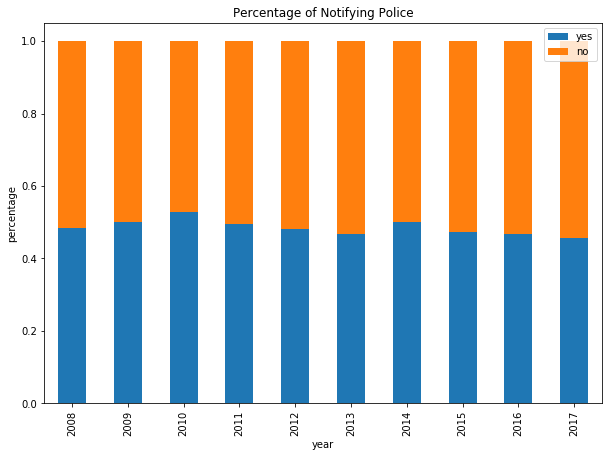

In [0]:
temp1.unstack().plot(kind='bar',stacked=True, figsize=(10,7))
plt.ylabel('percentage')
plt.title('Percentage of Notifying Police')
plt.legend(['yes', 'no'])
plt.show()

**Note** 
* Here we wanted to see if there was a difference between the years on the rate at which victims reported the crimes. It seemed like the rate was relatively similar throughout the years.

#Modeling

##Cleaning the Data

In [0]:
# download the data
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/NCVS_PERSONAL_VICTIMIZATION_2008-2017.csv')
data_num = data.copy(deep=True)
data.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,region,msa,direl,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
0,2008,4828.52379,2,1,2,1,2,1,3.0,1,2,2,3,2,2,0,1,4,2,0,0.0,2.0,4
1,2008,3087.88814,1,1,2,1,7,2,6.0,1,2,2,4,2,1,3,1,3,1,0,0.0,1.0,1
2,2008,3302.31117,2,1,2,1,5,1,1.0,1,2,2,1,1,2,0,1,1,1,0,0.0,2.0,1
3,2008,6796.96420,2,2,2,2,2,1,3.0,1,2,1,4,2,2,0,1,4,2,0,0.0,2.0,4
4,2008,3758.85256,2,1,2,1,5,5,88.0,1,3,2,4,2,3,5,1,2,1,0,0.0,2.0,5


**Note:**
* All of the categorical data were encoded for us so we did not have to do any encoding. A codebook is provided for the numericalized data, which can be found at this link: https://www.bjs.gov/developer/ncvs/personalFields.cfm

In [0]:
# generate descriptive statistics, excluding NaN values
data.describe()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,region,msa,direl,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
count,15487.000000,15487.000000,15487.000000,15487.000000,15487.000000,15487.000000,15487.000000,15487.000000,14957.000000,15487.000000,15487.000000,15487.000000,15487.000000,15487.000000,15487.000000,15487.000000,15487.00000,15487.000000,15487.000000,15487.000000,15467.000000,15289.000000,15487.000000
mean,2012.938142,3771.068377,1.512107,1.298250,1.949893,1.720217,5.085878,2.412733,22.919168,1.610706,2.722671,1.717311,3.299606,1.566992,1.870278,0.872861,1.02783,3.467231,1.686124,0.240008,0.343506,1.919158,2.424227
std,2.944323,5082.286911,0.499870,0.609102,2.957064,1.113729,1.884975,5.866953,34.841688,1.472069,1.020767,0.688102,1.237408,0.679787,0.531118,1.581663,0.16449,0.923215,0.520610,0.427102,0.659165,0.272602,1.320979
min,2008.000000,59.821060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2010.000000,1945.657310,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,0.000000,1.00000,3.000000,1.000000,0.000000,0.000000,2.000000,1.000000
50%,2013.000000,3070.250890,2.000000,1.000000,2.000000,1.000000,5.000000,2.000000,5.000000,1.000000,3.000000,2.000000,3.000000,2.000000,2.000000,0.000000,1.00000,4.000000,2.000000,0.000000,0.000000,2.000000,3.000000
75%,2016.000000,3909.655110,2.000000,1.000000,2.000000,2.000000,6.000000,2.000000,7.000000,2.000000,4.000000,2.000000,4.000000,2.000000,2.000000,1.000000,1.00000,4.000000,2.000000,0.000000,0.000000,2.000000,3.000000
max,2017.000000,153486.647700,2.000000,3.000000,88.000000,4.000000,8.000000,88.000000,88.000000,5.000000,4.000000,3.000000,6.000000,8.000000,3.000000,5.000000,2.00000,5.000000,3.000000,1.000000,2.000000,2.000000,5.000000


In [0]:
# return the number of households for police notification
data['notify'].value_counts(sort=False)

8      70
1    7333
2    7877
3     207
Name: notify, dtype: int64

**Note:**
* key:
  * 1 = Yes, reported to the police
  * 2 = No, did not report to the police
  * 3 = Do not know
* The value 8 was not present in the codebook so we decided to omit those rows entirely. Also we noticed that there was a huge class imbalance because not even 10% of the responses included the "Do not know" response so we decided to remove those rows as well to make this a binary classification problem.

In [0]:
# find the count of hispanic origin and not, without considering race
data['hispanic'].value_counts(sort=False)

88       18
1      2324
2     13145
Name: hispanic, dtype: int64

**Note:**
* Key:
  * 1 = Hispanic
  * 2 = Non-Hispanic
* The value 88 was not assigned a value in the codebook, therefore we removed all rows with 88 as the value for the "hispanic" column.

In [0]:
# find the count of each marital status
data['marital2'].value_counts()

1     7452
2     4211
4     2467
5      844
3      444
88      69
Name: marital2, dtype: int64

**Note:**
* Key: 
  * 1	= Never married
  * 2	= Married
  * 3= 	Widowed
  * 4	= Divorced
  * 5 =	Separated
* In the codebook, there were no values assigned for 88 other than household income so we removed all the rows with 88 as the values for the "marital2" column. 
* We also dropped the column "Weight" entirely because it's not related to the race of the victim or the type of crime experienced.

In [0]:
# find count for each household income bracket
data['hincome'].value_counts()

88.0    3325
7.0     2286
6.0     1775
3.0     1710
5.0     1683
2.0     1510
4.0     1439
1.0     1229
Name: hincome, dtype: int64

**Note:**
* Key: (all amounts are in U.S. Dollars)
  * 1	= Less than 7,500
  * 2 = 7,500 to 14,999
  * 3	= 15,000 to 24,999
  * 4	= 25,000 to 34,999
  * 5	= 35,000 to 49,999
  * 6	= 50,000 to 74,999
  * 7	= 75,000 or more
  * 88	= Unknown
* We noticed that there were a large number of households with unknown income and we thought it would be best to remove them to reduce unncessary noise.
* The total income of the household head and all members of the household for the 12 months preceding the interview. Includes wages, salaries, net income from businesses or farms, pensions, interest, dividends, rent, and any other form of monetary income.

In [0]:
list88 = []
for col in data.columns:
  if max(data[col]) == 88:
    list88.append(col)
list88

['hispanic', 'marital2', 'hincome']

**Note:**
* Lastly, we decided to drop the weight column as it was a redundant feature that was just derived from the population size.

In [0]:
# here we dropped the rows as discussed above.
data = data.drop(data[data['notify'] == 8].index)
data = data.drop(data[data['notify'] == 3].index)
data = data.drop(['weight'], axis=1)
data = data.drop(data[data['hincome'] == 88].index)
data = data.drop(data[data['marital2'] == 88].index)
data = data.drop(data[data['hispanic'] == 88].index)

In [0]:
data.columns[data.isnull().any()].tolist()

['hincome', 'treatment', 'vicservices']

**Note:**
*  Here we noticed that there were NaN values for household income, treatment, and vicservices for some of the rows. Instead of filling them with medians, we decided to remove those particular rows entirely because these features were categorical.

In [0]:
# remove missing valuesl; keep the DataFrame with valid entries in the same variable
data.dropna(inplace=True)

In [0]:
# return counts for whether or not a crime was reported to the police
data['notify'].value_counts(sort=False)

1    5284
2    6056
Name: notify, dtype: int64

**Note:** 
* The classes were a lot more balanced after all the data cleaning had been done.

##Choosing and Training the Model

In [0]:
X = data.drop(['notify'], axis=1)
y = data['notify']
np.random.seed(123)

In [0]:
models = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators=200), LogisticRegression(solver='liblinear'), GradientBoostingClassifier(n_estimators=200, learning_rate=1.0), GaussianNB()]
names = ['Decision Tree', 'Random Forest', 'Logistic', 'Gradient Boosting', 'Naive Bayes']

In [0]:
for model, label in zip(models, names):
  scores = cross_val_score(model, X, y, cv=KFold(5), scoring='accuracy')
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.57 (+/- 0.03) [Decision Tree]
Accuracy: 0.64 (+/- 0.02) [Random Forest]
Accuracy: 0.63 (+/- 0.01) [Logistic]
Accuracy: 0.60 (+/- 0.02) [Gradient Boosting]
Accuracy: 0.61 (+/- 0.01) [Naive Bayes]


**Note:** 
* After using kfold validation on multiple models, we decided to go with the Random Forest Classifier because it had the highest validation accuracy.

In [0]:
X = data.drop(['notify'], axis=1)
y = data['notify']
np.random.seed(123)
X, X_test, y, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25)

In [0]:
X_val

,year,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,region,msa,direl,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
5559,2012,1,2,2,2,7,5,1.0,2,3,1,4,1,1,1,2,1,0,0.0,2.0,3
4217,2011,2,1,1,4,6,1,3.0,1,4,2,1,2,0,1,4,2,1,1.0,2.0,1
128,2008,2,1,2,1,5,1,3.0,1,4,2,4,2,0,1,4,2,0,0.0,2.0,1
8541,2014,2,1,2,1,7,2,7.0,1,1,2,4,3,5,1,4,2,0,0.0,2.0,3
2648,2010,2,1,2,1,6,2,7.0,1,1,1,4,3,5,1,4,2,1,1.0,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11409,2016,2,1,2,1,7,4,3.0,4,4,1,4,2,0,1,4,2,0,0.0,2.0,3
6154,2012,2,2,2,2,5,1,1.0,2,3,1,3,2,0,1,4,2,0,0.0,2.0,1
2336,2009,2,2,2,2,4,1,6.0,2,2,1,4,1,2,1,3,1,0,0.0,2.0,3
993,2008,1,1,2,1,1,1,6.0,1,3,2,3,2,0,1,4,2,0,0.0,2.0,4


**Note:** 
* Here, the data is split into training, validation, and test sets. We allocated 60% of the data for training, 20% for validation, and 20% for testing.



**Note:** 
* Because all of our features are encoded using label encoding, we decided to use random forest because it is not affected by ordinality compared to other learning models such as a neural network. It also yielded the highest validation accuracy amongst other models.

### Random Forest Hyperparameter Tuning

**Random Forest**
* This is a supervised machine learning algorithm that can be used for both regression and classification. It's a predictive modelling tool that uses and ensemble of random individual decision trees. The more decision trees there are in the forest, the more robust the prediction, thus higher the accuracy. It essentially uses a subset of randomly selected features, and the best split feature from the subset is used to split each node, or branch, in a tree.



In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 100, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [0]:
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

**Note:** 
* This cell took about 20 minutes to run. You do not have to run it again since we already have the optimal parameters.

In [0]:
rforest = RandomForestClassifier(n_estimators=200, random_state=123)

In [0]:
rf_random = RandomizedSearchCV(estimator = rforest, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=1, random_state=123, n_jobs = 1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-c26903eca541>", line 2, in <module>
    rf_random.fit(X_train, y_train)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py", line 688, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py", line 1469, in _run_search
    random_state=self.random_state))
  File "/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py", line 667, in evaluate_candidates
    cv.split(X, y, groups)))
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 1006, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 834, in dispatch_one_batch
    self._dispatch(tasks)
  File "/u

KeyboardInterrupt: ignored

In [0]:
rf_random.best_params_

AttributeError: ignored

In [0]:
best_random = rf_random.best_estimator_
rf_random_acc = best_random.score(X_val, y_val)
print('Accuracy = {:0.4f}%.'.format(rf_random_acc))

AttributeError: ignored

**Note:** 
* These parameters were deemed to perform the best based on the parmeter search. From here, we can narrow down our parameters and do another search.

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [15, 30, 50],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4, 5, 6],
}

In [0]:
rf = RandomForestClassifier(n_estimators=200, random_state=123)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose=2)

In [0]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, total=   1.0s
[CV] bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, total=   1.0s
[CV] bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=4 
[CV]  bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, total=   1.0s
[CV] bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5 
[CV]  bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, total=   1.0s
[CV] bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5 
[CV]  bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, total=   1.0s
[CV] bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5 
[CV]  bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, total=   1.0s
[CV] bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=123,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'boots

In [0]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [0]:
best_grid = grid_search.best_estimator_

In [0]:
base_model = RandomForestClassifier(n_estimators=200, random_state=123)
rf_base_model = base_model.fit(X_train, y_train)
rf_base_acc = rf_base_model.score(X_val, y_val)
rf_grid_acc = best_grid.score(X_val, y_val)
print('Base Model Accuracy = {:0.4f}%.'.format(rf_base_acc))
print('Random Model Accuracy = {:0.4f}%.'.format(rf_random_acc))
print('Grid Search Model Accuracy = {:0.4f}%.'.format(rf_grid_acc))


Base Model Accuracy = 0.6803%.


NameError: ignored

**Note**


*   We noticed that the our validation accuracy rose by .003 after tuning out parameters which is not a lot. But we still decided to go with the model given by our grid search because it did have the highest validation accuracy


In [0]:
#testing out different max_depths to see which yields the best validation accuracy while not overfitting
max_depths = np.linspace(1, 35, 35, endpoint=True)
train_results = []
val_results = []
for max_depth in max_depths:
  rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, n_estimators=200)
  rf.fit(X_train, y_train)
  train_results.append(rf.score(X_train, y_train))
  val_results.append(rf.score(X_val, y_val))

In [0]:
plt.figure(figsize=(10,8))
plt.plot(max_depths, train_results)
plt.plot(max_depths, val_results, 'r',label='line')
plt.legend(['Training','Validation'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

**Note**
* Here we can see that training accuracy as well as validation accuracy increases as the maximum depth increases. However, bigger values of maximum depth lead to overfitting. The sweet spot seemed to be around 11 according to this graph but our grid search decided that 30 would be most optimal. Due to overfitting, we will proceed with the max_depth value of 11.

In [0]:
best_grid.get_params()

We will use all the parameters given by this except the maximum depth as explained above

##Feature Selection

###Permutation Importance Feature Selection

In [0]:
rforest = RandomForestClassifier(n_estimators=500, max_depth=11, bootstrap=True, max_features='sqrt', min_samples_leaf=1, min_samples_split=4, random_state=123)
rforest.fit(X_train, y_train)

In [0]:
perm = PermutationImportance(rforest).fit(X_train, y_train)
sel = SelectFromModel(perm, threshold=0.01, prefit=True)
X_trans_train = sel.transform(X_train)
X_trans_val = sel.transform(X_val)
X_trans_test = sel.transform(X_test)

In [0]:
perm_forest_model = rforest.fit(X_trans_train, y_train)
print('Training accuracy: ', perm_forest_model.score(X_trans_train, y_train))
print('Validation accuracy: ',perm_forest_model.score(X_trans_val, y_val))
eli5.show_weights(perm, feature_names = X_val.columns.to_list())

We were able to get a decent insight on which features were most important in determining whether the person notified the police or not.

### Recursive Feature Elimination

In [0]:
model = RandomForestClassifier(n_estimators=200, max_depth=11, bootstrap=True, max_features='sqrt', min_samples_leaf=1, min_samples_split=4, random_state=123)
rfe = RFECV(estimator=model, cv=2, scoring='accuracy', n_jobs=-1, verbose=2)
rfe.fit(X_train, y_train)
print("Training accuracy:", rfe.score(X_train, y_train))
print("Validation accuracy:", rfe.score(X_val, y_val))
print("Number of features:", rfe.n_features_)

### Feature Importance Selection

In [0]:
model = RandomForestClassifier(n_estimators=500, max_depth=11, bootstrap=True, max_features='sqrt', min_samples_leaf=1, min_samples_split=4, random_state=123)

#fit your model
model.fit(X_train, y_train)

# Select the important features of previous model
sel = SelectFromModel(model, prefit=True)

# Subset features by calling transform on your training X
select_X_train = sel.transform(X_train)
select_X_test = sel.transform(X_test)
select_X_val = sel.transform(X_val)
# We want to create a train model
sel_model = RandomForestClassifier(n_estimators=500, max_depth=11, bootstrap=True, max_features='sqrt', min_samples_leaf=1, min_samples_split=4, random_state=123)
sel_model.fit(select_X_train, y_train)
print('Training Accuracy: ', sel_model.score(select_X_train, y_train))
print('Validation Accuracy: ', sel_model.score(select_X_val, y_val))

Feature importance selection resulted in a much lower validation score compared to other feature selection methods so we decided not to use it.

###Feature Selection Based on Correlation and Intuition

In [0]:
corrmat = data.corr()
plt.figure(figsize=(17,17))
g = sns.heatmap(corrmat, annot=True)

In [0]:
# columns with at least -.1 correlation
corrmat.loc[corrmat['notify'] < -0.1]['notify']

In [0]:
# columns with at least .1 correlation
corrmat.loc[corrmat['notify'] > 0.1]['notify']

In [0]:
# creating feature list
neg = corrmat.loc[corrmat['notify'] < -0.1].index.tolist()
pos = corrmat.loc[corrmat['notify'] > 0.1].index.tolist()
pos.pop(0)
pos.extend(neg)
pos.extend(['race1r','year'])
features = pos
features

In [0]:
X_train_feats = X_train[features]
X_val_feats = X_val[features]
X_test_feats = X_test[features]

In [0]:
rforest_feats = RandomForestClassifier(bootstrap= True, max_depth=11, max_features = 'sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=500)
rforest_feats.fit(X_train_feats, y_train)
rforest_feats_test_pred = rforest_feats.predict(X_test_feats)
print('Training Accuracy: ', rforest_feats.score(X_train_feats, y_train))
print('Validation Accuracy: ', rforest_feats.score(X_val_feats, y_val))
confusion_matrix(y_test, rforest_feats_test_pred, labels=[1,2])

Feature selection based on correlation and intuition did not really give us better results.

##One Hot Encoding all Categorical Variables

We wanted to explore if one hot encoding all the categorical variables would do anything to help the accuracy and maybe give more insight as to what features are affecting the model the most.

In [0]:
data_hot = pd.get_dummies(data, columns=data.columns.to_list())
data_hot.columns

In [0]:
X = data_hot.drop(['notify_1', 'notify_2'], axis=1)
y = data['notify']
np.random.seed(123)
X_hot, X_test_hot, y_hot, y_test_hot = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)
X_train_hot, X_val_hot, y_train_hot, y_val_hot = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25)

In [0]:
one_hot = RandomForestClassifier(bootstrap= True, max_depth=11, max_features = 'sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=2000)
one_hot.fit(X_train_hot, y_train_hot)
one_hot.score(X_val_hot, y_val_hot)

In [0]:
feature_importances = pd.DataFrame(one_hot.feature_importances_[-15:],
                                   index = X_train_hot.columns[-15:],
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot.bar(figsize=(10,10))
plt.title('RandomForest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

###Final Model
* We decided to use permutation selection to pick our features as well as model because it is supposed to not choose features based on high cardinality and ignore ordinality as opposed to traditional feature importance selection.

# Conclusion

## Results

####Confusion Matrix and Test Accuracy

In [0]:
nb_df_cm = pd.DataFrame(confusion_matrix(y_test, perm_forest_model.predict(X_trans_test)), range(2), range(2))
nb_df_cm = nb_df_cm.rename(index=str, columns={0: "yes", 1: "no"})
nb_df_cm.index = ['yes', 'no'] 
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(nb_df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
perm_test_acc = perm_forest_model.score(X_trans_test, y_test)
print('Random Forest Test Accuracy: ', perm_test_acc)

#### Feature Importance Explanations

In [0]:
eli5.show_weights(perm, feature_names = X_val.columns.to_list())

In [0]:
rforest = RandomForestClassifier(n_estimators=500, max_depth=11, bootstrap=True, max_features='sqrt', min_samples_leaf=1, min_samples_split=4, random_state=123)
rforest.fit(X_train, y_train)
feature_importances = pd.DataFrame(rforest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot.bar(figsize=(8,8))
plt.title('RandomForest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [0]:
feature_importances = pd.DataFrame(one_hot.feature_importances_[-15:],
                                   index = X_train_hot.columns[-15:],
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot.bar(figsize=(10,10))
plt.title('One Hot Encoding Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

##Note##
Both feature importance models showed that 'locationr', the location of the incident, was considered the most important feature. When one hot encoding was used to train the model, it also showed the location was the most important feature. More specifically location 1 and 4 seemed to have the most impact which makes sense because location 1 and 4 represent "At or near the victim's home" and "school" respectively. Although permutation importance was supposed to reduce the bias that gets introduced with high cardinality categorical variables, it seems like it failed to do that since year and age were still considered pretty improtant features and they had the one of the highest cardinalities amongst all of the other variables. It is pretty evident that one hot encoding most accurately gave us which features were actually important althought it did not perform the best.

It was interesting to see that race was actually considered to be one of the more useless features. It was not too surprising though because in our EDA we saw that the rates at which the two races report to the police was about the same. 

##Extra Classification (Race)


We tried predicting the race based on other features but we were not able to reach a meaningful conclusion because our model predicted white for most cases. This is probably due to the huge class imbalance.

In [0]:
data.columns

In [0]:
data_hot = pd.get_dummies(data, columns=data.columns.to_list())
data_hot.columns

In [0]:
X = data_hot.drop(['race1r_1', 'race1r_2', 'race1r_3', 'hispanic_1', 'hispanic_2', 'ethnic1r_1', 'ethnic1r_2', 'ethnic1r_3',
       'ethnic1r_4'], axis=1)
y = data['race1r']
np.random.seed(123)
X_hot, X_test_hot, y_hot, y_test_hot = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)
X_train_hot, X_val_hot, y_train_hot, y_val_hot = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25)

In [0]:
rforest = RandomForestClassifier(n_estimators=500, max_depth=11, bootstrap=True, max_features='sqrt', min_samples_leaf=1, min_samples_split=4, random_state=123)
rforest.fit(X_train_hot, y_train_hot)
print(rforest.score(X_train_hot, y_train_hot))
print(rforest.score(X_val_hot, y_val_hot))
rforest.score(X_test_hot, y_test_hot)

In [0]:
nb_df_cm = pd.DataFrame(confusion_matrix(y_test_hot, rforest.predict(X_test_hot)), range(3), range(3))
nb_df_cm = nb_df_cm.rename(index=str, columns={0: "White", 1: "Black", 2: 'Other'})
nb_df_cm.index = ['White', 'Black', 'Other'] 
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(nb_df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
feature_importances = pd.DataFrame(rforest.feature_importances_[-15:],
                                   index = X_train_hot.columns[-15:],
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot.bar(figsize=(10,10))
plt.title('One Hot Encoding Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**Reflection:**

* While analyzing the data, it was quickly realized early on that race has very little impact in influencing whether or not a victim reports a crime. As briefly mentioned previously, this may be due to the disparity in the number of white households (approximately 12,000) surveyed versus the number of black households surveyed (approximately 2000). Even with this difference, it appears that the black race report crimes more often than whites, which contradicts our initial belief that African Americans are less likely to report crimes/victimization instances. Given this, perhaps blacks experience crimes that are worse than those experienced by whites, hencing blacks report more despite the difference in numbers in each race. Nevertheless, this served as an important note to recognize during our analysis.

* After analyzing the data, we concluded that the location of incident (locationr) is an important feature. Location is a measure of where the victimization occurred, and it includes: 1) at or near victim’s home; 2) at or near friend, neighbor, or relative’s home; 3) commercial place, parking lot, or other public area; 4) school; and 5) other location. This finding provides an crucial indicator of where crime problems are occurring, therefore drawing attention to what about those locations attract criminal activity and what can be done to combat them. Perhaps some attribute or attributes about a particular type of location have the propensity to make them more prone to criminal activity, therefore this suggests changes to be made.

* We used the random forest learning algorithm for feature selection, but we eventually decided to also explore the usage of one hot encoding. Essentially, one hot encoding transforms categorical data into a format that is easier for machine learning algorithms to work with. We also used permuation importance feature selection to give us a glimpse of which features may be most important in determining whether a victim notified the police or not in regard to their victimization. As mentioned above, both feature importance models indicate that location of the incident is the most crucial feature. One hot encoding ultimately provided a more accurate prediction of which variables are important. Although this was not the best model for our study, it nevertheless allowed us to inspect the significant variables of the dataset. Therefore, perhaps another research could further investigate in the future.

* The conclusion of our research simply gives a small glimpse of the possibilities that can come from the dataset, for there are many other goals that can be achieved by exploring it further.
From a legal perspective, the this dataset and the continuous collection of responses to this survey could help serve as an index of any changes in reporting behavior in the population. This could then help shape the legal aspect of the criminal justice system, such as enacting new laws or creating programs that could improve behavior based on legal consequences. From a policy perspective, the dataset and future areas of research could help explain any issues with the criminal justice system. By determining such problems, it forces public policy to change in order to reflect the areas that need attention in this country. There are reasons behind people’s decisions to report crimes or not, there are reasons why particular locations experience more crime, there are reasons behind the types of crimes, and much. Therefore, it’s worth looking into channels that may influence policy making to better the system. From an ethical perspective, public confidence in police is crucial to the wellbeing of a society. Future areas of research could explore if perhaps police training meet the ethical and moral standards that reflect this country. We often hear about police brutality and the police fatally killing allegedly innocent people, so perhaps there is a discrepancy between their training and our ethical standards. Perhaps by looking into victims’ accounts of their victimization and their process with the police after the fact could shine some light onto the situation.  There remains much room for improvement and exploration after our research, but ultimately, this dataset is optimal to provide information of the nature and levels of crime that occur in our society.

